In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [2]:
df = pd.read_csv("crime.csv",encoding='latin1')

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

# Data cleaning

## SHOOTING

In [5]:
df.drop(['SHOOTING'],axis =1,inplace=True)

## DISTRICT

In [6]:
df['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

In [7]:
df.dropna(subset=['DISTRICT'],inplace=True)

## UCR_PART

In [8]:
df.dropna(subset=['UCR_PART'],inplace=True)

## STREET

In [9]:
df.dropna(subset=['STREET'],inplace=True)

# LAT and LONG

We have the exact number of null lat and null long, so i think it may be the same entries, and we have no null location entries, so we can get the lat and the long from the location column.

Hypothesis: the entries, that have Lat and Long null values, are the same.

In [10]:
a = df[df['Lat'].isna()]['INCIDENT_NUMBER'].tolist()
b = df[df['Long'].isna()]['INCIDENT_NUMBER'].tolist()

In [11]:
a == b

True

The hypotheis is true.

In [12]:
aux = df[df['Lat'].isna()][['Lat','Long','Location']]

In [13]:
aux

,Lat,Long,Location
1075,NaN,NaN,"(0.00000000, 0.00000000)"
1089,NaN,NaN,"(0.00000000, 0.00000000)"
1090,NaN,NaN,"(0.00000000, 0.00000000)"
1091,NaN,NaN,"(0.00000000, 0.00000000)"
1094,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...
318999,NaN,NaN,"(0.00000000, 0.00000000)"
319014,NaN,NaN,"(0.00000000, 0.00000000)"
319042,NaN,NaN,"(0.00000000, 0.00000000)"
319059,NaN,NaN,"(0.00000000, 0.00000000)"


We don't have the location for that entries, so we'll drop that values.

In [14]:
df.dropna(subset=['Lat','Long'],inplace=True)

In [15]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

# Feature engineer

## Numerical day of week

In [16]:
## changing day of week to numerical valeus
days_of_week = {'Monday': 1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(days_of_week)

In [17]:
df['DAY_OF_WEEK']

0         7
1         2
2         1
3         1
4         1
         ..
319068    7
319069    4
319070    4
319071    2
319072    1
Name: DAY_OF_WEEK, Length: 296573, dtype: int64

In [18]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

## Dropping unused columns

In [19]:
df.drop(['OFFENSE_CODE','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','UCR_PART','Location','REPORTING_AREA'],axis =1,inplace=True)

In [20]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,I182070945,Larceny,D14,2018,9,7,13,LINCOLN ST,42.357791,-71.139371
1,I182070943,Vandalism,C11,2018,8,2,0,HECLA ST,42.306821,-71.060300
2,I182070941,Towed,D4,2018,9,1,19,CAZENOVE ST,42.346589,-71.072429
3,I182070940,Investigate Property,D4,2018,9,1,21,NEWCOMB ST,42.334182,-71.078664
4,I182070938,Investigate Property,B3,2018,9,1,21,DELHI ST,42.275365,-71.090361


# Data analysis

## District with most occurrences

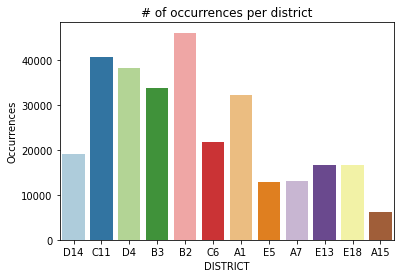

In [21]:
occurrencesDistrict = sns.countplot(x = df['DISTRICT'], palette='Paired')
occurrencesDistrict.set_title('# of occurrences per district')
occurrencesDistrict.set_ylabel("Occurrences")
plt.show()

## Top 10 streets with more occurrences


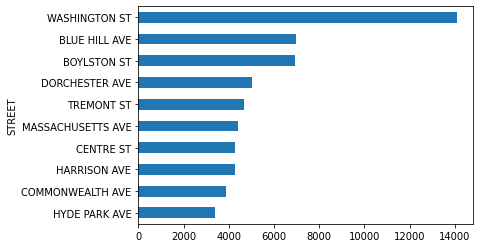

In [22]:
df.groupby('STREET').size().sort_values(ascending = False).head(10).sort_values().plot(kind = 'barh')

Washington street is by far the street with more ocurrences

### Washington street occurences

In [23]:
washingtonStreet = df[df['STREET'] == 'WASHINGTON ST']

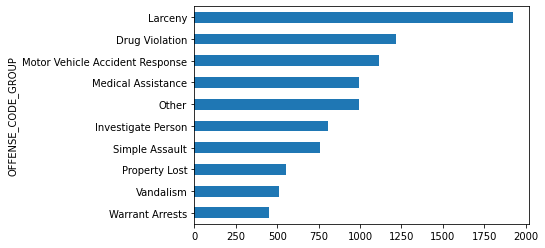

In [24]:
washingtonStreet.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending= False).head(10).sort_values().plot(kind = 'barh')

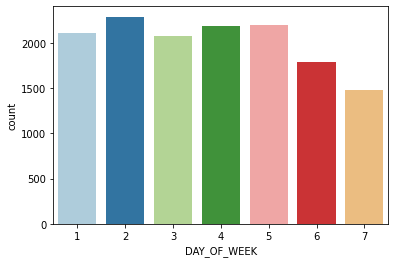

In [25]:
sns.countplot(x = washingtonStreet['DAY_OF_WEEK'],palette='Paired')

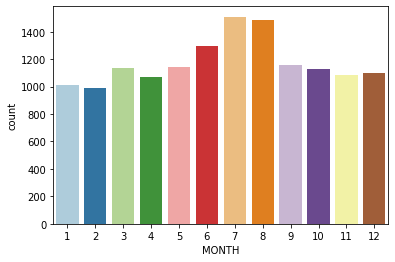

In [26]:
sns.countplot(x = washingtonStreet['MONTH'],palette='Paired')

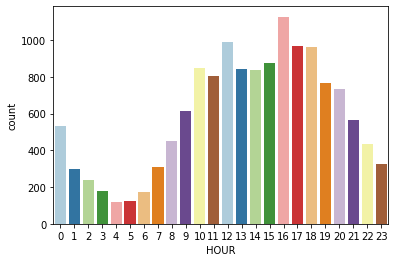

In [27]:
sns.countplot(x = washingtonStreet['HOUR'],palette='Paired')

Quick analysis for Washington street: 
- Larceny is the group with more occurrences
- Sunday is the safest day, probably because there is less movement
- The hours with more occurrences start by 10:00 and end by 20:00, so i think that's the period with more movement on the street
- The occurrences have almost the same distribution in the months

## Day of week with most occurrences

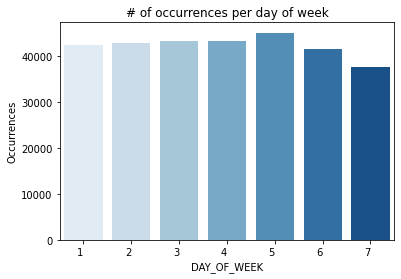

In [28]:
occurrencesDayOfWeek = sns.countplot(x = df['DAY_OF_WEEK'],palette='Blues')
occurrencesDayOfWeek.set_title('# of occurrences per day of week')
occurrencesDayOfWeek.set_ylabel("Occurrences")
occurrencesDayOfWeek.set_xticklabels(occurrencesDayOfWeek.get_xticklabels(),horizontalalignment ='right' )
plt.show()

## OFFENSE_CODE_GROUP with most occurrences

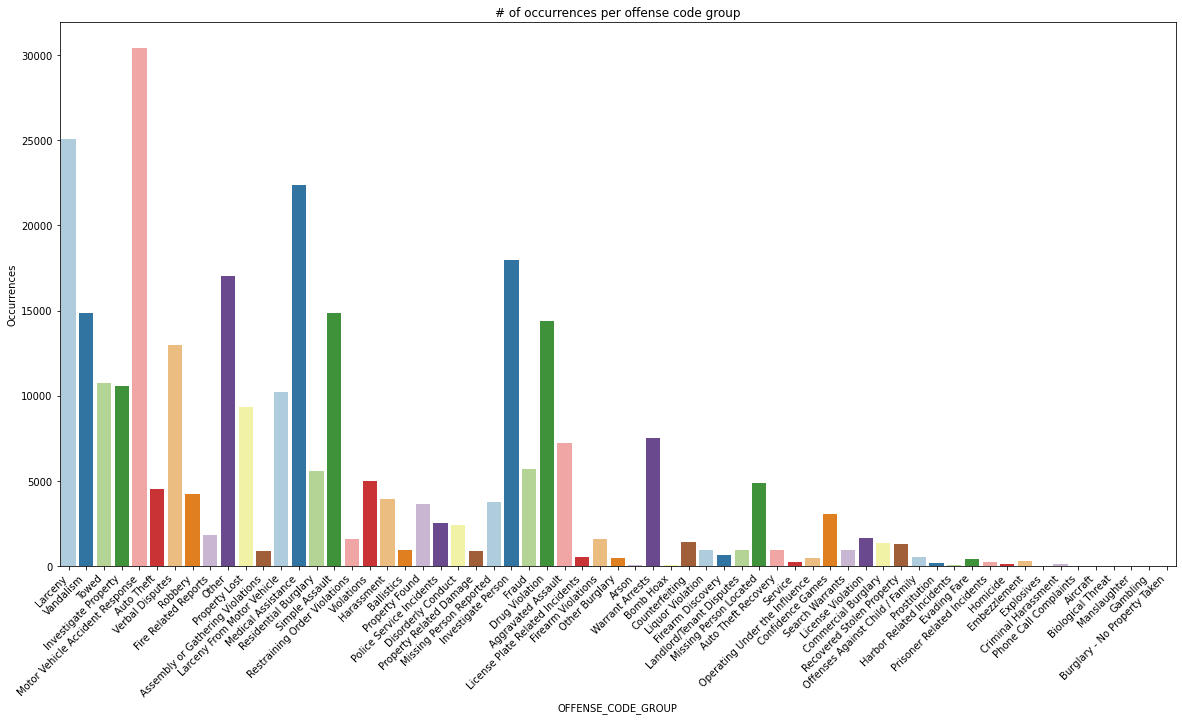

In [29]:
plt.figure(figsize=(20,10))
occurrencesOffenseCodeGroup = sns.countplot(x = df['OFFENSE_CODE_GROUP'],palette='Paired')
plt.figure
occurrencesOffenseCodeGroup.set_title('# of occurrences per offense code group')
occurrencesOffenseCodeGroup.set_ylabel("Occurrences")
occurrencesOffenseCodeGroup.set_xticklabels(occurrencesOffenseCodeGroup.get_xticklabels(),rotation = 45,horizontalalignment ='right' )
plt.show()

We have a few offense codes that correspond for a big number of the occorrences.

In [30]:
df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending = False).head()

Motor Vehicle Accident Response    30385
Larceny                            25070
Medical Assistance                 22373
Investigate Person                 17973
Other                              17028
Name: OFFENSE_CODE_GROUP, dtype: int64

### Top 10 offense groups

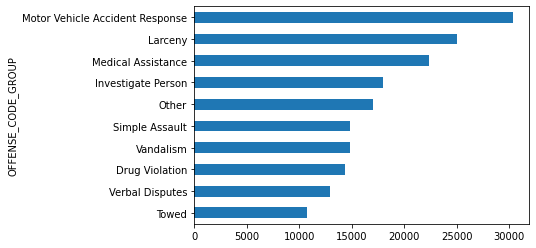

In [31]:
df.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending= False).head(10).sort_values().plot(kind = 'barh')

Larceny is the 'criminal' occurrence that occurs more often, i'll analyze these occurrences deeper, later

## Occurrences by month divided by year

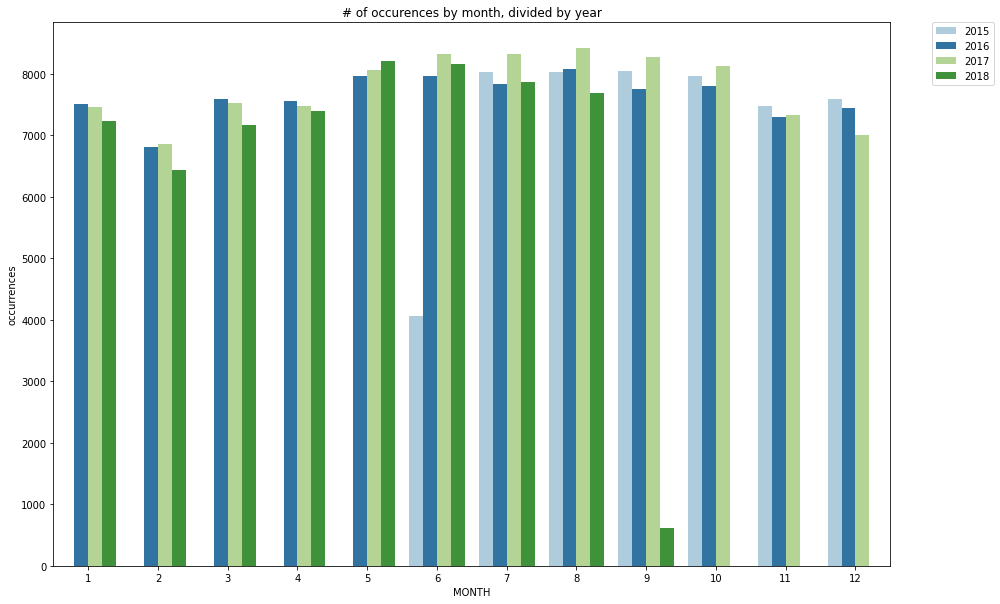

In [32]:
plt.figure(figsize=(15,10))
occurrencesMonthYear = sns.countplot(x = df['MONTH'],hue=df['YEAR'],palette='Paired')
occurrencesMonthYear.set_title('# of occurences by month, divided by year')
occurrencesMonthYear.set_ylabel("occurrences")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The number of occurrences by month is kind of consistent for the 4 years in the dataset, and we can see that we hve entries from june of 2015 to september of 2018.

For that reason i'll drop the entries for 2015 and 2018

In [33]:
df = df[df['YEAR'] != 2015]
df = df[df['YEAR'] != 2018]
len(df)

184642

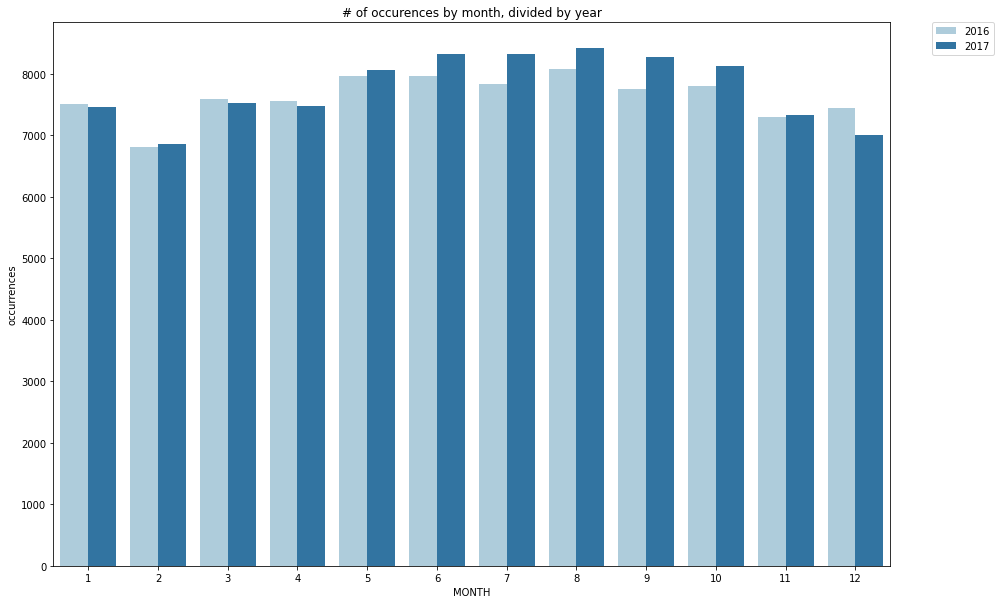

In [34]:
plt.figure(figsize=(15,10))
occurrencesMonthYear = sns.countplot(x = df['MONTH'],hue=df['YEAR'],palette='Paired')
occurrencesMonthYear.set_title('# of occurences by month, divided by year')
occurrencesMonthYear.set_ylabel("occurrences")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Most occurred OFFENSE_CODE_GROUP by day

In [35]:
dfAux = df[['OFFENSE_CODE_GROUP','DAY_OF_WEEK']]

In [36]:
monday = dfAux[dfAux['DAY_OF_WEEK'] == 1]
tuesday = dfAux[dfAux['DAY_OF_WEEK'] == 2]
wednesday = dfAux[dfAux['DAY_OF_WEEK'] == 3]
thursday = dfAux[dfAux['DAY_OF_WEEK'] == 4]
friday = dfAux[dfAux['DAY_OF_WEEK'] == 5]
saturday = dfAux[dfAux['DAY_OF_WEEK'] == 6]
sunday = dfAux[dfAux['DAY_OF_WEEK'] == 7]

In [37]:
mostOccurred = {}
mostOccurred['monday'] = (monday['OFFENSE_CODE_GROUP'].value_counts().index[0],monday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['tuesday'] = (tuesday['OFFENSE_CODE_GROUP'].value_counts().index[0],tuesday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['wednesday'] = (wednesday['OFFENSE_CODE_GROUP'].value_counts().index[0],wednesday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['thursday'] = (thursday['OFFENSE_CODE_GROUP'].value_counts().index[0],thursday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['friday'] = (friday['OFFENSE_CODE_GROUP'].value_counts().index[0],friday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['saturday'] = (saturday['OFFENSE_CODE_GROUP'].value_counts().index[0],saturday['OFFENSE_CODE_GROUP'].value_counts()[0])
mostOccurred['sunday'] = (sunday['OFFENSE_CODE_GROUP'].value_counts().index[0],sunday['OFFENSE_CODE_GROUP'].value_counts()[0])

In [38]:
mostOccurred

{'monday': ('Motor Vehicle Accident Response', 2586),
 'tuesday': ('Motor Vehicle Accident Response', 2620),
 'wednesday': ('Motor Vehicle Accident Response', 2639),
 'thursday': ('Motor Vehicle Accident Response', 2623),
 'friday': ('Motor Vehicle Accident Response', 2953),
 'saturday': ('Motor Vehicle Accident Response', 2924),
 'sunday': ('Motor Vehicle Accident Response', 2579)}

as we can see, 'Motor vehicle accident response' is the occurence with the most entries, and it makes sense considering the nature of the occurrence

## Locations with more occurrences

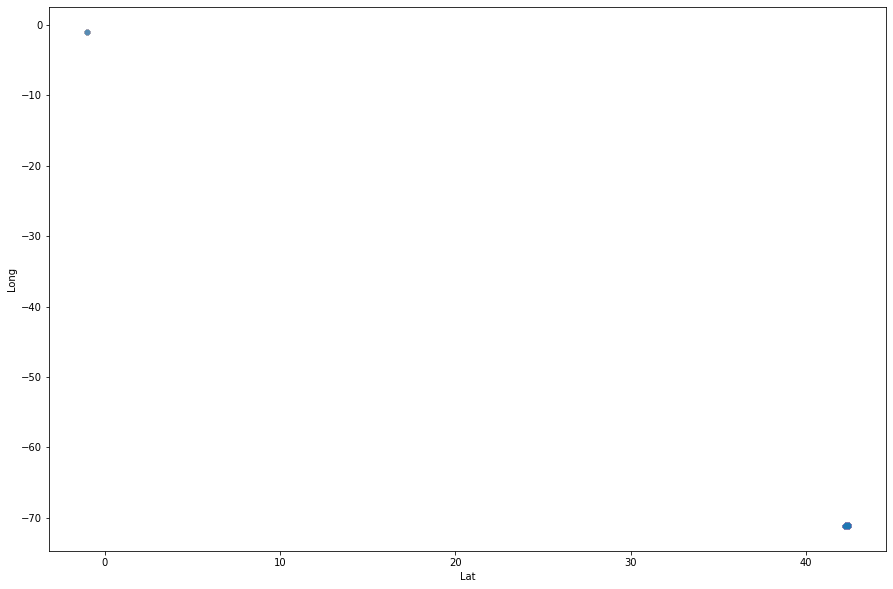

In [39]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = df['Lat'],y = df['Long'],alpha = 0.01)

### Removing outliers

Looks like we have some outliers in the [0,-3] range.

In [40]:
df['Lat'].min()

-1.0

In [41]:
df['Long'].max()

-1.0

In [42]:
#first replace the -1 outliers with nan
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)
#drop nan values
df.dropna(subset=['Lat','Long'],inplace=True)

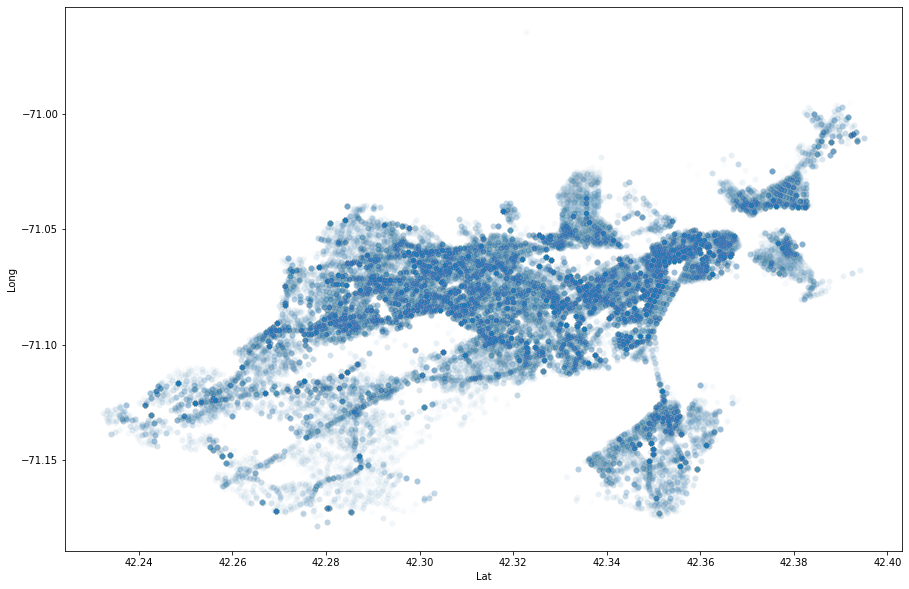

In [43]:
# Plot again
plt.figure(figsize=(15,10))
sns.scatterplot(x = df['Lat'],y = df['Long'],alpha = 0.02)

We can see some 'hotspot' areas where the graph is darker.

# Larceny analysis

## Getting dummies variables

In [44]:
#df = pd.get_dummies(df.drop('INCIDENT_NUMBER',axis = 1),drop_first=True,sparse=True)

In [45]:
df

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
569,I182070304,Fraud,D4,2017,11,3,0,E BROOKLINE ST,42.339268,-71.072088
744,I182070115,Investigate Property,D14,2017,10,3,17,KELTON ST,42.346501,-71.136128
923,I182069920,Property Lost,B2,2017,8,4,12,SHAWMUT AVE,42.331925,-71.084112
1162,I182069657,Fraud,D14,2017,6,2,7,COMMONWEALTH AVE,42.338482,-71.152890
1444,I182069334,Property Lost,B3,2017,12,5,22,MORTON ST,42.279591,-71.081323
...,...,...,...,...,...,...,...,...,...,...
319053,I100636670-00,Warrant Arrests,D4,2016,6,7,17,COVENTRY ST,42.336951,-71.085748
319057,I100033064-00,Violations,B2,2016,7,5,18,SLAYTON WAY,42.321770,-71.097798
319058,I100033064-00,Violations,B2,2016,7,5,18,SLAYTON WAY,42.321770,-71.097798
319068,I050310906-00,Warrant Arrests,D4,2016,6,7,17,COVENTRY ST,42.336951,-71.085748


In [46]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long'],
      dtype='object')